In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os

In [ ]:
labels = ['FRACTURED','STABLE']
img_size = 150
def get_training_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = get_training_data('/content/drive/MyDrive/x-rays/train')

<ipython-input-3-d9a430d203c4>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [ ]:
test = get_training_data('/content/drive/MyDrive/x-rays/test')
val = get_training_data('/content/drive/MyDrive/x-rays/val')

<ipython-input-3-d9a430d203c4>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [ ]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Fractured")
    else:
        l.append("Stable")
sns.set_style('darkgrid')
sns.countplot(l)

ValueError: ignored

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])

In [ ]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [ ]:
print(y_test)

In [ ]:
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [ ]:
# resize data for deep learning
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)
x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [ ]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      320       
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 75, 75, 64)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 75, 75, 64)       2

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [ ]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 12 , validation_data = datagen.flow(x_val, y_val) ,callbacks = [learning_rate_reduction])

Epoch 1/12
272/272 [==============================] - 414s 2s/step - loss: 0.2967 - accuracy: 0.8648 - val_loss: 1.0479 - val_accuracy: 0.6833 - lr: 3.0000e-04
Epoch 2/12
272/272 [==============================] - 405s 1s/step - loss: 0.2680 - accuracy: 0.8807 - val_loss: 1.8043 - val_accuracy: 0.6500 - lr: 3.0000e-04
Epoch 3/12
272/272 [==============================] - ETA: 0s - loss: 0.2332 - accuracy: 0.8962
Epoch 3: ReduceLROnPlateau reducing learning rate to 9.000000427477062e-05.
272/272 [==============================] - 467s 2s/step - loss: 0.2332 - accuracy: 0.8962 - val_loss: 1.4805 - val_accuracy: 0.6617 - lr: 3.0000e-04
Epoch 4/12
272/272 [==============================] - 401s 1s/step - loss: 0.1944 - accuracy: 0.9180 - val_loss: 1.3704 - val_accuracy: 0.6683 - lr: 9.0000e-05
Epoch 5/12
272/272 [==============================] - ETA: 0s - loss: 0.1682 - accuracy: 0.9278
Epoch 5: ReduceLROnPlateau reducing learning rate to 2.700000040931627e-05.
272/272 [==================

In [ ]:
import tensorflow as tf
tf.keras.models.save_model(model,'my_model13.hdf5')

In [ ]:
import tensorflow as tf
model=tf.keras.models.load_model('/content/drive/MyDrive/x-rays/my_model13.hdf5')
labels = ['FRACTURED','STABLE']

In [ ]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

38/38 [==============================] - 25s 622ms/step - loss: 0.2446 - accuracy: 0.9552
Loss of the model is -  0.24458207190036774
38/38 [==============================] - 14s 378ms/step - loss: 0.2446 - accuracy: 0.9552
Accuracy of the model is -  95.52238583564758 %


In [ ]:
predictions=model.predict(x_test)

38/38 [==============================] - 25s 638ms/step


In [ ]:
print(predictions)

[[3.8481092e-05]
 [2.4369562e-03]
 [1.1176076e-02]
 ...
 [9.9950445e-01]
 [9.7655845e-01]
 [7.5897509e-01]]


In [ ]:
cm = confusion_matrix(y_test,predictions.round())
cm

array([[521,  46],
       [  8, 631]])

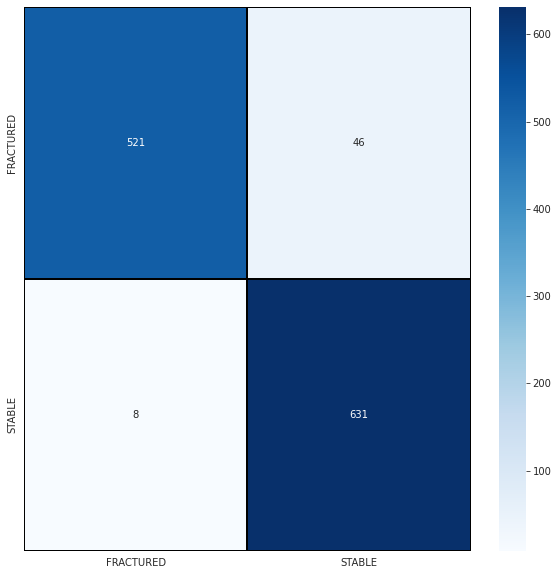

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

In [ ]:
#@title
import cv2
img_arr = cv2.imread(os.path.join('/content/drive/MyDrive/x-rays/test/STABLE/10-rotated1-rotated1-rotated2.jpg'), cv2.IMREAD_GRAYSCALE)
img_arr = img_arr/255
resized_arr = cv2.resize(img_arr, (150, 150))
resized_arr = resized_arr.reshape(-1, 150, 150, 1)
predictions = model.predict(resized_arr)
print(predictions)
print(predictions.round())

1/1 [==============================] - 0s 40ms/step
[[0.9984819]]
[[1.]]
